## <font color=red> Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

    
**Goal:**

Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## <font color=red> Import libraries
  

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# import warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# to display complete contents of a dataframe without any kind of truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

## <font color=red> Step 1: Reading and Understanding Data

1. Importing data using the pandas library
2. Understanding the structure of the data

In [4]:
# load data
bike = pd.read_csv('day.csv')

In [5]:
# display top 5 rows
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# total number of rows and columns
bike.shape

(730, 16)

In [7]:
# check the information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# check the statistics
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


> **Insights:**
- There are 16 columns and 730 rows for the given dataset
- Except dteday, all other variables are numeric
- No NULL values present in any column

## <font color=red>Step 2 : Data Cleaning

###  <font color=blue>Removing unecessary variables

The following columns can be removed
1. `instant`: It's serial numbers for each entry so can be removed
2. `dteday`: We have yr and mnth variables, so dates can be removed
3. `casual`and `registered`: cnt is our target variable and these two variables add up to cnt, so we will remove them as when we use our model for prediction these two variables won't be available.

In [9]:
# drop variables
bike.drop(columns=['instant', 'dteday','casual', 'registered'], inplace=True)

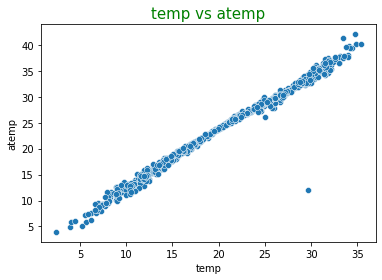

In [10]:
sns.scatterplot(data=bike, x='temp', y='atemp')
plt.title('temp vs atemp',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.show()

4. `temp`: temp and atemp which are highly correlated variables and we will use only one of them

In [11]:
# dropping temp

bike.drop(columns=['temp'], inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


### <font color=blue> Checking the categorical and continuous variables

In [12]:
bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600
5,1,0,1,0,6,0,1,11.66045,51.8261,6.000868,1606
6,1,0,1,0,0,0,2,10.44195,49.8696,11.304642,1510
7,1,0,1,0,1,1,2,8.11270,53.5833,17.875868,959
8,1,0,1,0,2,1,1,5.80875,43.4167,24.250650,822
9,1,0,1,0,3,1,1,7.54440,48.2917,14.958889,1321


In [13]:
# checking value_counts for categorical variables

for i in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']:
    print(bike.value_counts(i))
    print('='*70)

season
3    188
2    184
1    180
4    178
dtype: int64
yr
0    365
1    365
dtype: int64
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
dtype: int64
holiday
0    709
1    21 
dtype: int64
weekday
1    105
2    105
0    104
3    104
4    104
5    104
6    104
dtype: int64
workingday
1    504
0    226
dtype: int64
weathersit
1    463
2    246
3    21 
dtype: int64


We can clearly see
1. **Categorical:** `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`
2. **Continuous:** `atemp`, `hum`, `windspeed`, `cnt`

In [14]:
# saving the categorical and continuous var for further use

cat_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']

cont_var = ['atemp', 'hum', 'windspeed', 'cnt']

### <font color=blue> Changing the datatype

We need to convert the following categorcal variables to object type since we will need to do dummification later:
- `season`
- `mnth`
- `weekday`
- `weathersit`


Will use the following mapping for the variables
1. **`season`:** 1:'spring', 2:'summer', 3:'fall', 4:'winter'
2. **`mnth`:** 1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'
3. **`weekday`:** 0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thur', 5:'fri', 6:'sat'
4. **`weathersit`:** 1:'clear+partlycloudy', 2:'mist+cloudy', 3:'light_snow+rain', 4:'heavy_rain+snow'

In [15]:
# season
bike[['season']] = bike[['season']].apply(lambda x:x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

# mnth
bike[['mnth']] = bike[['mnth']].apply(lambda x:x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}))

# weekday
bike[['weekday']] = bike[['weekday']].apply(lambda x:x.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thur', 5:'fri', 6:'sat'}))

# weathersit
bike[['weathersit']] = bike[['weathersit']].apply(lambda x:x.map({1:'clear+partlycloudy', 2:'mist+cloudy', 3:'lightsnow+rain', 4:'heavyrain+snow'}))

In [16]:
# check the value counts to see if mapping has been applied
for i in ['season','mnth','weekday','weathersit']:
    print(bike.value_counts(i))
    print('='*70)

season
fall      188
summer    184
spring    180
winter    178
dtype: int64
mnth
aug    62
dec    62
jan    62
jul    62
mar    62
may    62
oct    62
apr    60
jun    60
nov    60
sep    60
feb    56
dtype: int64
weekday
mon     105
tue     105
fri     104
sat     104
sun     104
thur    104
wed     104
dtype: int64
weathersit
clear+partlycloudy    463
mist+cloudy           246
lightsnow+rain        21 
dtype: int64


## <font color=red>Step 3 : Data Visualisation

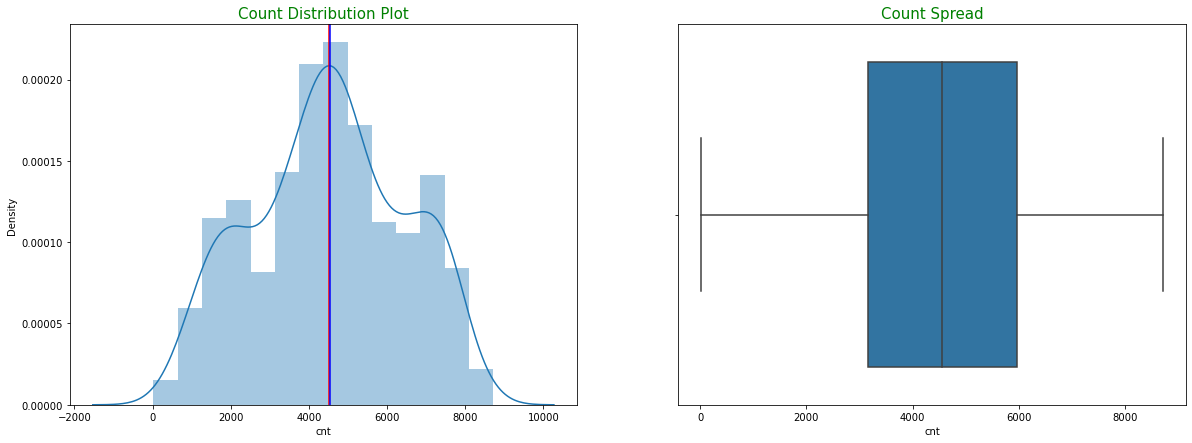

In [17]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
sns.distplot(bike.cnt)
plt.axvline(bike.cnt.mean(), color="r")
plt.axvline(bike.cnt.median(), color="b")
plt.title('Count Distribution Plot', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})

plt.subplot(1,2,2)
sns.boxplot(bike.cnt)
plt.title('Count Spread', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})

plt.show()

> **Insights:**
- Bike counts are normally distributed, with mean and median being same
- There are no outliers present 

### <font color=blue> Visualisation of categorical columns

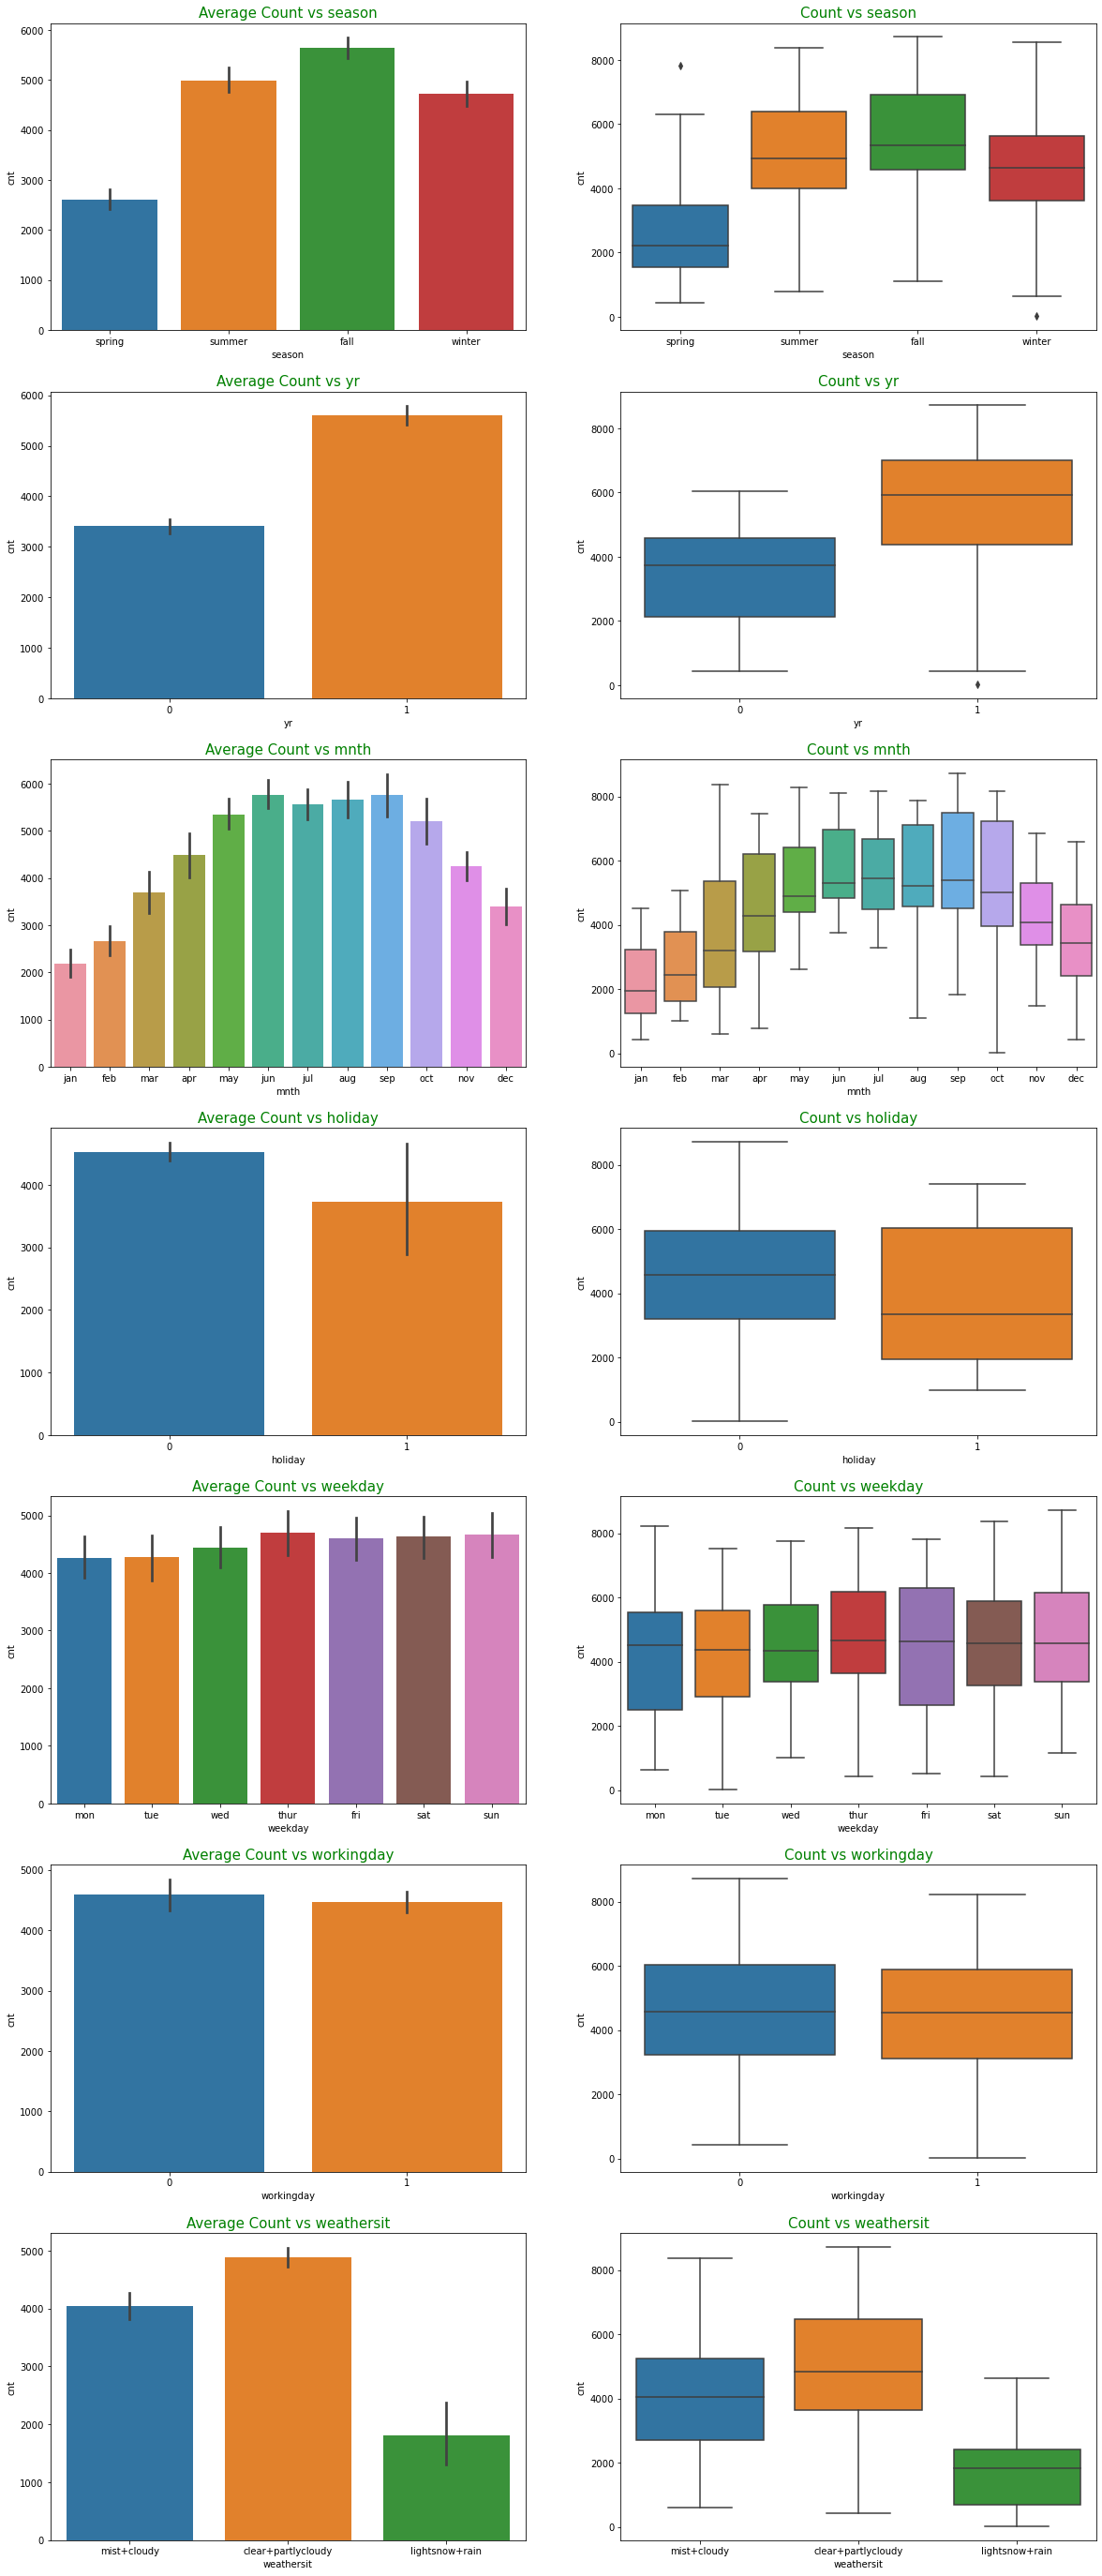

In [18]:
plt.figure(figsize=(20,100))

for i,v in enumerate(cat_var):
    plt.subplot(14,2,2*(i+1)-1)
    plt.title(f'Average Count vs {v}',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
    sns.barplot(data=bike, x=v, y='cnt')
    
    plt.subplot(14,2,2*(i+1))
    plt.title(f'Count vs {v}',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
    sns.boxplot(data=bike, x=v, y='cnt')

> **Insights:**
- The count is highest in the fall season followed by summer, while being lowest in spring. Even the spread of count in spring is lesser than compared to other seasons.
- The same is evident from the month vs cnt plot, where count is high in the months of may to oct, while being lowest in months of jan and feb. even the min count in may, june and july is quite high compared to other months
- The count is much higher in 2019 compared to 2018. Even the max count in 2018 is lesser.
- Not much variation in count across the days of the week
- Average count on holidays is less
- There is not much difference between average count on working and non-working days
- Average count on clear days is highest and lowest on rainy days with max count almost equal to the median count of clear.


### <font color=blue> Visualisation of continuous variables

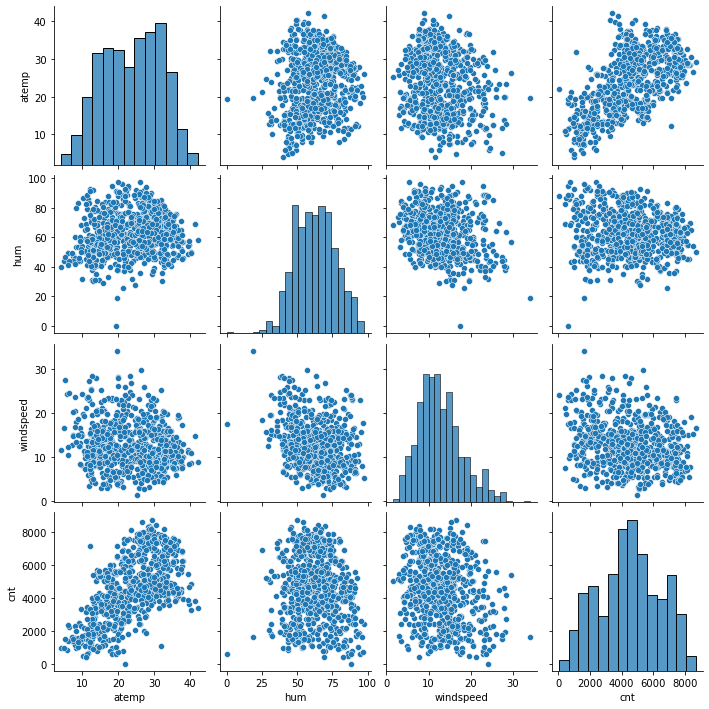

In [19]:
# pairplot

sns.pairplot(bike[cont_var])
plt.show()

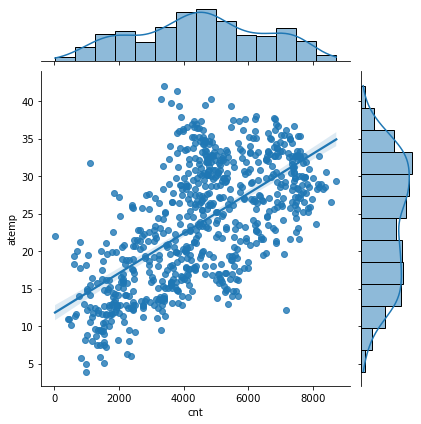

In [20]:
sns.jointplot(data=bike, x='cnt', y='atemp', kind='reg')
plt.show()

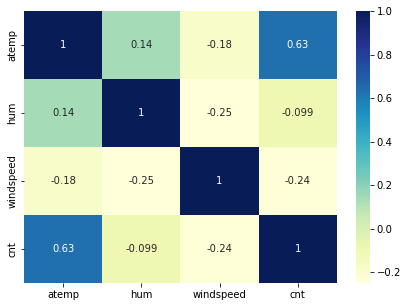

In [21]:
plt.figure(figsize=(7,5))
sns.heatmap(bike[cont_var].corr(), annot=True, cmap='YlGnBu')
plt.show()

> **Insights:**
- `atemp` seems to have a positive correlation with `cnt`
- `hum` and `windspeed` don't show any significant trend with `cnt`
- There seems to be no correlation even between the independent variables

In [22]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist+cloudy,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist+cloudy,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear+partlycloudy,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thur,1,clear+partlycloudy,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear+partlycloudy,11.46350,43.6957,12.522300,1600


### <font color=blue> Bivariate Analysis

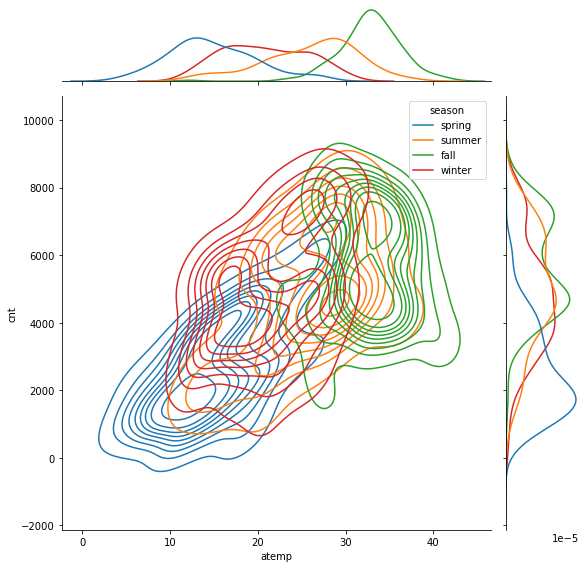

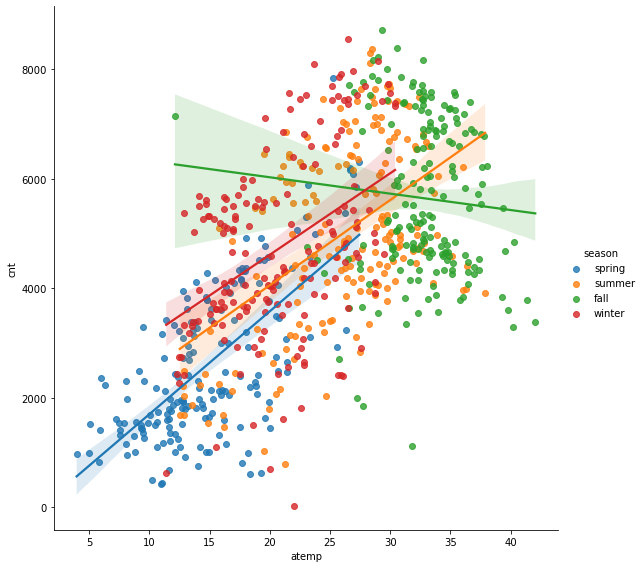

In [23]:
sns.jointplot(data=bike, x='atemp', y='cnt', hue='season', kind='kde', height=8)
sns.lmplot(data=bike, x='atemp', y='cnt', hue='season', height=8)
plt.show()

> **Insights:**
- There is a negative correlation of `atemp` with `cnt` in fall season and positive in other seasons
- Also, we can see some correlation between `season` and `atemp` with temp in spring being more on low end and that in fall being more on high end

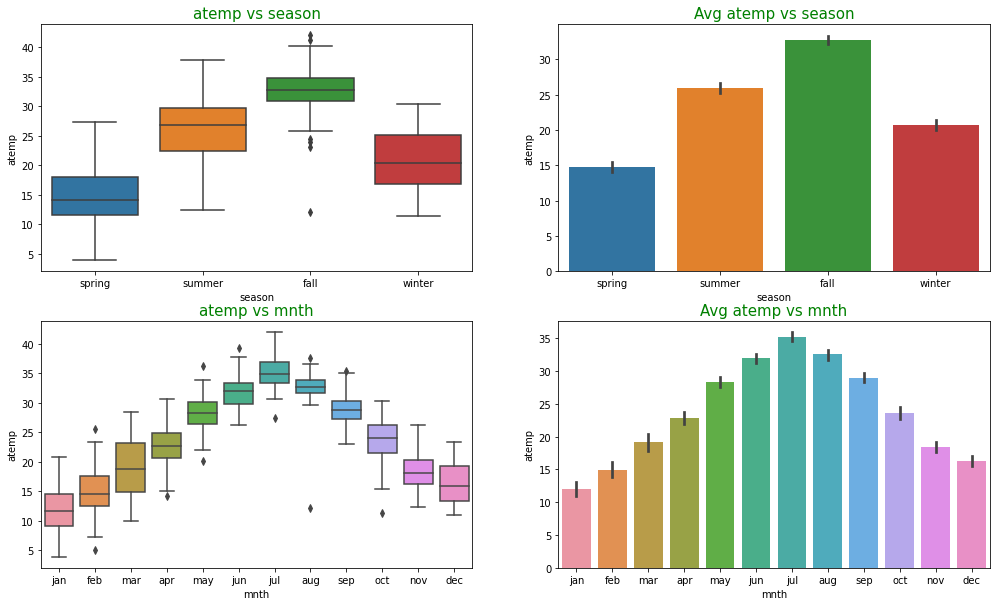

In [24]:
plt.figure(figsize=(17,10))

for i,v in enumerate(['season','mnth']):
    plt.subplot(2,2,(i+1)*2-1)
    sns.boxplot(data=bike, x=v, y='atemp')
    plt.title(f'atemp vs {v}',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
    plt.subplot(2,2,(i+1)*2)
    sns.barplot(data=bike, x=v, y='atemp')
    plt.title(f'Avg atemp vs {v}',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})

> **Insights:**
- There is some correlation between the independent variables `atemp` and `season` as well as `atemp` and `mnth`

<font color=brown>**List of significant variables after Visual Analysis**
- `atemp`
- `season`
- `mnth`
- `yr`
- `holidays`
- `weathersit`

<font color=green>**List of independent variables which may be correlated after Visual Analysis**
- season
- mnth
- atemp

## <font color=red>Step 4 : Data Preparation

### <font color=blue>Creating Dummy Variables

In [25]:
bike = pd.get_dummies(bike, columns=['season','mnth','weekday','weathersit'], drop_first=True, prefix=None)
bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_lightsnow+rain,weathersit_mist+cloudy
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
bike.shape

(730, 29)

### <font color=blue> Dividing into train and test data sets

In [27]:
# import library
from sklearn.model_selection import train_test_split

# dividing data into train and test set
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size=0.75, random_state=100)

### <font color=blue> Rescaling Features of train set

In [28]:
# import library
from sklearn.preprocessing import MinMaxScaler

# we will use MinMaxScaler

scaler = MinMaxScaler()  # create object
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']  # numerical variables
df_train[num_vars] = scaler.fit_transform(df_train[num_vars]) # apply fit_transform()

In [29]:
# check the statistics of df_train to see if scaling has been done
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_lightsnow+rain,weathersit_mist+cloudy
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.508227,0.027422,0.718464,0.511400,0.650673,0.319317,0.511382,0.257770,0.244973,0.244973,0.093236,0.087751,0.073126,0.08958,0.071298,0.078611,0.096892,0.084095,0.082267,0.087751,0.080439,0.151737,0.124314,0.133455,0.140768,0.160878,0.144424,0.027422,0.349177
std,0.500390,0.163460,0.450160,0.211788,0.144515,0.169239,0.225008,0.437807,0.430465,0.430465,0.291029,0.283192,0.260582,0.28584,0.257557,0.269376,0.296082,0.277784,0.275022,0.283192,0.272220,0.359094,0.330242,0.340377,0.348100,0.367754,0.351841,0.163460,0.477146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.326287,0.538858,0.197844,0.350437,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.521862,0.655216,0.294101,0.514266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.753113,0.413761,0.682697,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


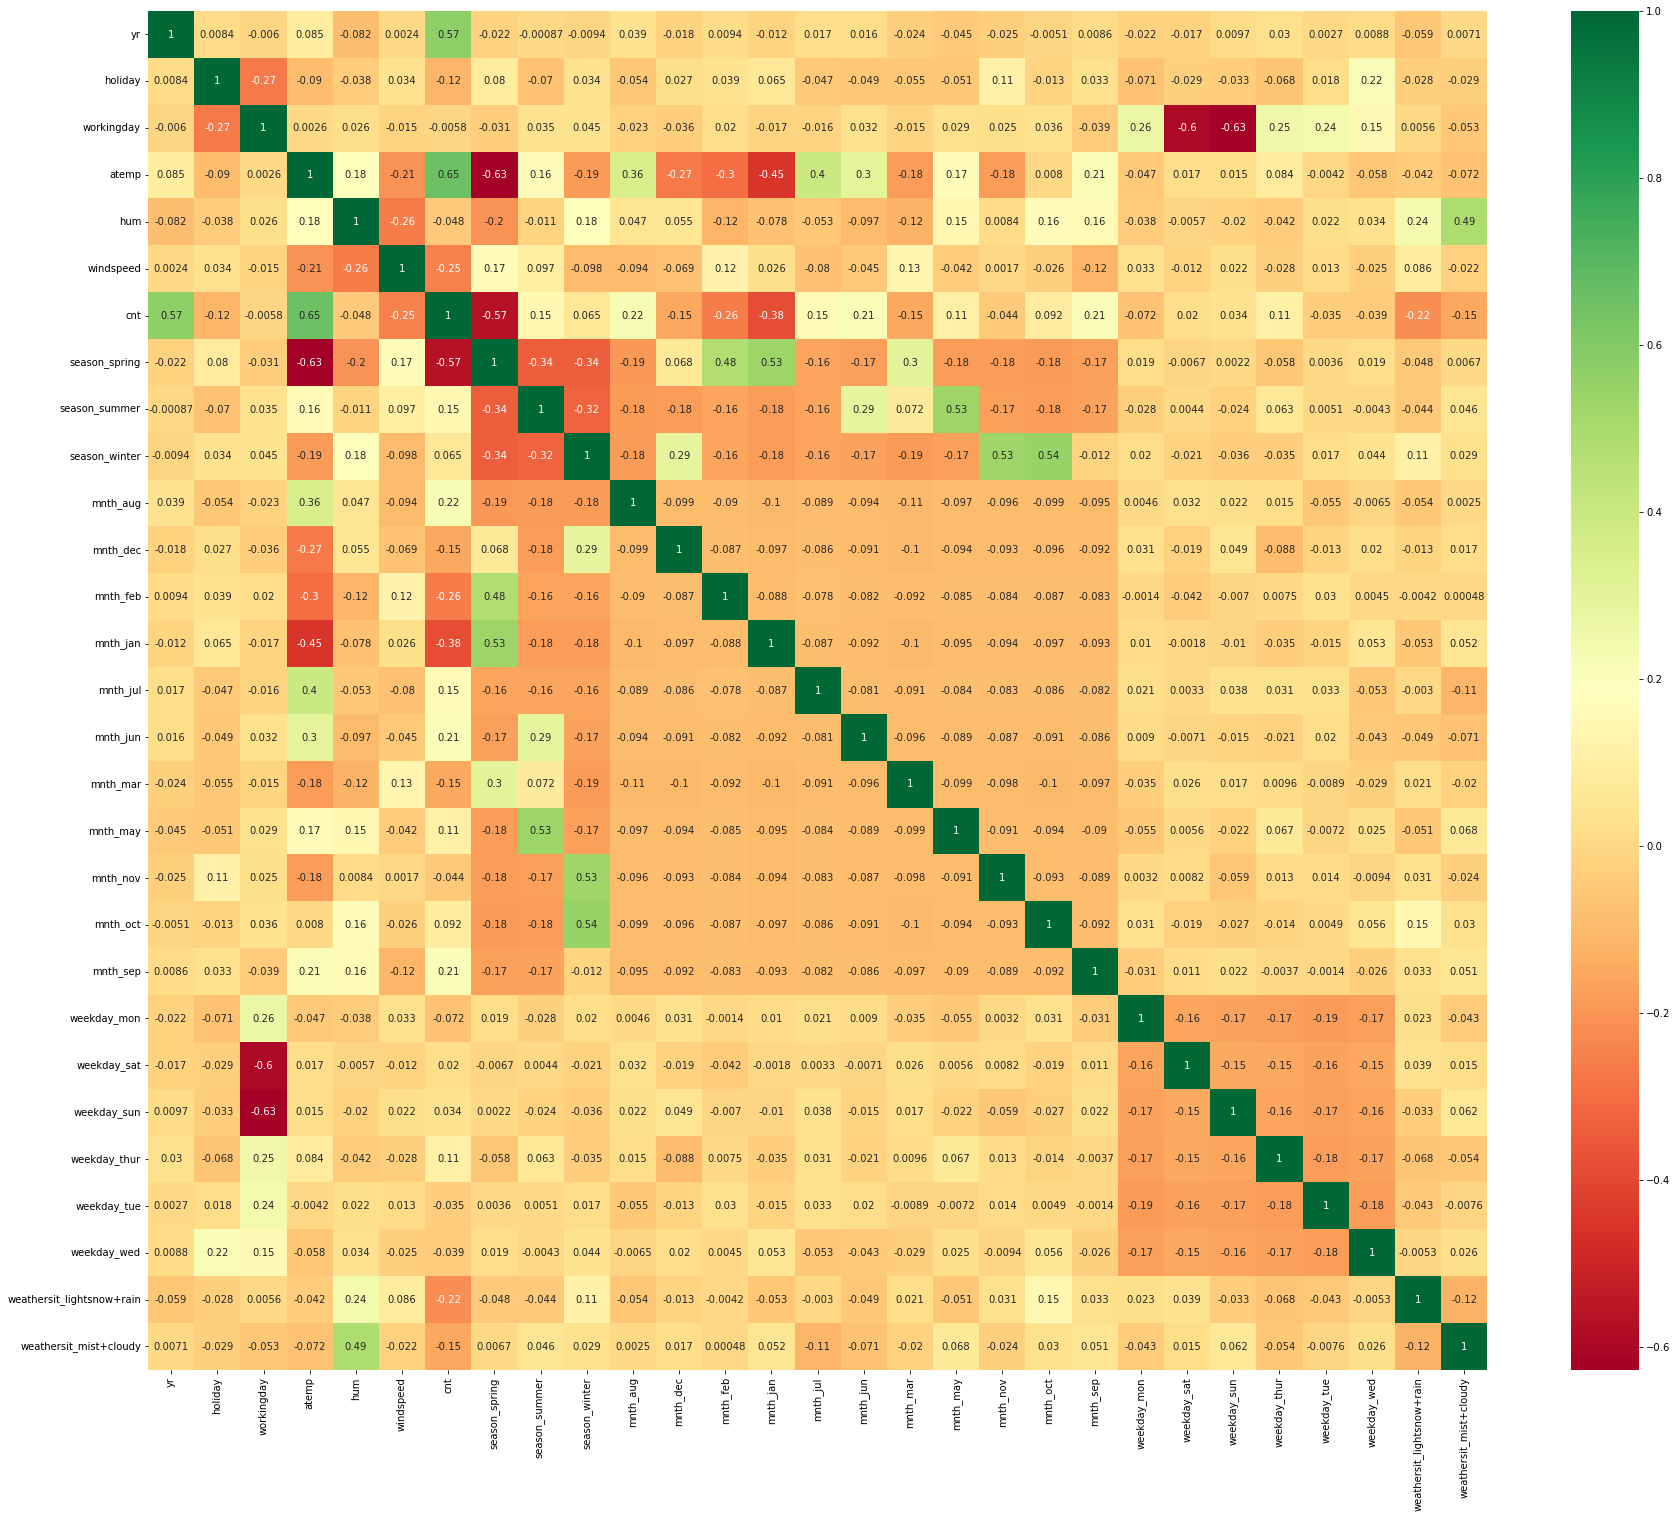

In [30]:
# correlation using heatmap

plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn')
plt.show()

### <font color=blue> Dividing train set into X and y

In [31]:
# Dividing into X and y variables
y_train = df_train.pop('cnt')
X_train = df_train

In [32]:
# checking y_train
y_train.head()

311    0.481247
523    0.887483
381    0.335136
413    0.494248
253    0.578003
Name: cnt, dtype: float64

In [33]:
# checking X_train
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_lightsnow+rain,weathersit_mist+cloudy
311,0,0,1,0.437339,0.743667,0.057471,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
523,1,0,0,0.680985,0.482181,0.286093,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
381,1,0,1,0.374375,0.737917,0.659615,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
413,1,0,1,0.362754,0.550880,0.319514,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
253,0,0,1,0.695906,0.735509,0.156398,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [34]:
X_train.shape

(547, 28)

## <font color=red>Step 5 : Model building

In [35]:
# importing required libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
# define model building func using statsmodel
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    return X, lm

# define func which calculates VIF
def check_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return(vif)

In [37]:
X_train_new, lm = build_model(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.86e-194
Time:                        22:53:18   Log-Likelihood:                 561.49
No. Observations:                 547   AIC:                            -1065.
Df Residuals:                     518   BIC:                            -940.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3905      0.083      4.686      0.000       0.227       0.554
yr                            0.2319      0.008     29.724      0.000       0.217       0.247
holiday                      -0.1364      0.065     -2.093      0.037      -0.264      -0.008
workingday                   -0.0471      0.070     -0.672      0.502      -0.185       0.091
atemp                         0.4145      0.044      9.475      0.000       0.329       0.500
hum                          -0.1482      0.038     -3.910      0.000      -0.223      -0.074
windspeed                    -0.1585      0.025     -6.356      0.000      -0.207      -0.110
season_spring                -0.0555      0.029     -1.923      0.055      -0.112       0.001
season_summer                 0.0393      0.025      1.550      0.122      -0.011       0.089
season_winter                 0.1136      0.027      4.248      0.000       0.061       0.166
mnth_aug                      0.0480      0.032      1.485      0.138      -0.015       0.112
mnth_dec                     -0.0587      0.032     -1.816      0.070      -0.122       0.005
mnth_feb                     -0.0376      0.032     -1.180      0.239      -0.100       0.025
mnth_jan                     -0.0663      0.033     -2.032      0.043      -0.130      -0.002
mnth_jul                     -0.0092      0.034     -0.273      0.785      -0.076       0.057
mnth_jun                      0.0333      0.023      1.438      0.151      -0.012       0.079
mnth_mar                      0.0026      0.024      0.106      0.915      -0.046       0.051
mnth_may                      0.0311      0.020      1.523      0.128      -0.009       0.071
mnth_nov                     -0.0503      0.035     -1.425      0.155      -0.120       0.019
mnth_oct                      0.0085      0.035      0.246      0.806      -0.059       0.076
mnth_sep                      0.0986      0.031      3.182      0.002       0.038       0.159
weekday_mon                  -0.0292      0.014     -2.056      0.040      -0.057      -0.001
weekday_sat                  -0.0396      0.071     -0.560      0.575      -0.178       0.099
weekday_sun                  -0.0370      0.071     -0.524      0.600      -0.176       0.102
weekday_thur                  0.0012      0.015      0.080      0.936      -0.027       0.030
weekday_tue                  -0.0283      0.014     -2.026      0.043      -0.056      -0.001
weekday_wed                  -0.0093      0.015     -0.640      0.523      -0.038       0.019
weathersit_lightsnow+rain    -0.2527      0.026     -9.545      0.000      -0.305      -0.201
weathersit_mist+cloudy       -0.0590      0.010     -5.827      0.000      -0.079      -0.039
===========================================================================

> **Insights:**
- We can clearly see that the model created using all the variables, p-values of many of them are > 0.05
- So, we will reduce the complexity of the model by reducing the variables
- We will follow the mixed approach
    - First, we will use RFE to reduce the variables
    - Then, we will manually remove the variables one by one by checking the R2, adj. R2, VIF etc each time to get a good model

### <font color=blue> RFE

In [38]:
# using RFE to reduce the variables to 15

lr = LinearRegression()  # create object
lr.fit(X_train, y_train) # fit model
rfe = RFE(lr, n_features_to_select = 15) # running RFE
rfe = rfe.fit(X_train, y_train)

In [39]:
# checking which variables were retained and which were dropped with ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 10),
 ('mnth_jun', False, 3),
 ('mnth_mar', False, 13),
 ('mnth_may', False, 4),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 6),
 ('weekday_sun', False, 7),
 ('weekday_thur', False, 14),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 11),
 ('weathersit_lightsnow+rain', True, 1),
 ('weathersit_mist+cloudy', True, 1)]

In [40]:
# list of 15 columns chosen by RFE which are significant
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_jan',
       'mnth_nov', 'mnth_sep', 'weathersit_lightsnow+rain',
       'weathersit_mist+cloudy'],
      dtype='object')

In [41]:
# list of columns rejected by RFE which are not significant
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_feb', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thur', 'weekday_tue', 'weekday_wed'],
      dtype='object')

### <font color=blue> Building model using statsmodel for detailed statistics

In [42]:
# removing columns deemed as insignificant by RFE

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_jan,mnth_nov,mnth_sep,weathersit_lightsnow+rain,weathersit_mist+cloudy
311,0,0,0.437339,0.743667,0.057471,0,0,1,0,0,0,1,0,0,0
523,1,0,0.680985,0.482181,0.286093,0,1,0,0,0,0,0,0,0,0
381,1,0,0.374375,0.737917,0.659615,1,0,0,0,0,1,0,0,0,1
413,1,0,0.362754,0.550880,0.319514,1,0,0,0,0,0,0,0,0,0
253,0,0,0.695906,0.735509,0.156398,0,0,0,0,0,0,0,1,0,0


In [43]:
X_train_rfe.shape

(547, 15)

<font color=brown>**MODEL 1**

In [44]:
# build 1st model

X_train_lm, lm = build_model(X_train_rfe, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.7
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          5.51e-203
Time:                        22:53:18   Log-Likelihood:                 548.58
No. Observations:                 547   AIC:                            -1065.
Df Residuals:                     531   BIC:                            -996.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3083      0.035      8.719      0.000       0.239       0.378
yr                            0.2303      0.008     29.424      0.000       0.215       0.246
holiday                      -0.0995      0.024     -4.150      0.000      -0.147      -0.052
atemp                         0.4643      0.036     12.858      0.000       0.393       0.535
hum                          -0.1593      0.037     -4.291      0.000      -0.232      -0.086
windspeed                    -0.1648      0.025     -6.605      0.000      -0.214      -0.116
season_spring                -0.0535      0.021     -2.536      0.012      -0.095      -0.012
season_summer                 0.0656      0.016      4.126      0.000       0.034       0.097
season_winter                 0.1252      0.018      7.012      0.000       0.090       0.160
mnth_aug                      0.0491      0.017      2.833      0.005       0.015       0.083
mnth_dec                     -0.0474      0.016     -2.872      0.004      -0.080      -0.015
mnth_jan                     -0.0430      0.017     -2.499      0.013      -0.077      -0.009
mnth_nov                     -0.0475      0.018     -2.587      0.010      -0.084      -0.011
mnth_sep                      0.1012      0.017      5.929      0.000       0.068       0.135
weathersit_lightsnow+rain    -0.2460      0.026     -9.296      0.000      -0.298      -0.194
weathersit_mist+cloudy       -0.0557      0.010     -5.483      0.000      -0.076      -0.036
==============================================================================
Omnibus:                       75.198   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.659
Skew:                          -0.681   Prob(JB):                     3.62e-45
Kurtosis:                       5.669   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# check VIF values

vif = check_vif(X_train_rfe)
vif

,Features,VIF
3,hum,31.93
2,atemp,16.08
5,season_spring,4.77
4,windspeed,4.52
7,season_winter,4.19
6,season_summer,3.19
14,weathersit_mist+cloudy,2.32
0,yr,2.08
8,mnth_aug,1.79
11,mnth_nov,1.78


> **Insight:** Here, p-values are good but VIF value for `hum` is high, so will remove this variable

In [46]:
# dropping variable
X_train_new = X_train_rfe.drop('hum', axis=1)

<font color=brown>**MODEL 2**

In [47]:
# build 2nd model

X_train_lm, lm = build_model(X_train_new, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          3.14e-200
Time:                        22:53:18   Log-Likelihood:                 539.26
No. Observations:                 547   AIC:                            -1049.
Df Residuals:                     532   BIC:                            -984.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2362      0.032      7.471      0.000       0.174       0.298
yr                            0.2345      0.008     29.709      0.000       0.219       0.250
holiday                      -0.0997      0.024     -4.089      0.000      -0.148      -0.052
atemp                         0.4240      0.035     11.967      0.000       0.354       0.494
windspeed                    -0.1375      0.025     -5.607      0.000      -0.186      -0.089
season_spring                -0.0649      0.021     -3.052      0.002      -0.107      -0.023
season_summer                 0.0563      0.016      3.521      0.000       0.025       0.088
season_winter                 0.1096      0.018      6.169      0.000       0.075       0.144
mnth_aug                      0.0435      0.018      2.477      0.014       0.009       0.078
mnth_dec                     -0.0549      0.017     -3.295      0.001      -0.088      -0.022
mnth_jan                     -0.0494      0.017     -2.833      0.005      -0.084      -0.015
mnth_nov                     -0.0493      0.019     -2.645      0.008      -0.086      -0.013
mnth_sep                      0.0916      0.017      5.323      0.000       0.058       0.125
weathersit_lightsnow+rain    -0.2910      0.025    -11.787      0.000      -0.339      -0.242
weathersit_mist+cloudy       -0.0810      0.008     -9.622      0.000      -0.097      -0.064
==============================================================================
Omnibus:                       77.115   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.006
Skew:                          -0.701   Prob(JB):                     6.79e-46
Kurtosis:                       5.676   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# check VIF values

vif = check_vif(X_train_new)
vif

,Features,VIF
2,atemp,5.12
3,windspeed,4.50
4,season_spring,3.00
6,season_winter,2.99
5,season_summer,2.47
0,yr,2.06
10,mnth_nov,1.74
7,mnth_aug,1.71
9,mnth_jan,1.62
13,weathersit_mist+cloudy,1.60


> **Insight:** Here, p-values are good but VIF value for `atemp` and `windspeed` is high, but since we already know that `atemp` is highly correlated with `cnt`, so won't drop it and drop `windspeed`

In [49]:
# dropping variable
X_train_new = X_train_new.drop('windspeed', axis=1)

<font color=brown>**MODEL 3**

In [50]:
# build 3rd model 

X_train_lm, lm = build_model(X_train_new, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     199.0
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          8.77e-195
Time:                        22:53:18   Log-Likelihood:                 523.56
No. Observations:                 547   AIC:                            -1019.
Df Residuals:                     533   BIC:                            -958.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1743      0.030      5.723      0.000       0.115       0.234
yr                            0.2332      0.008     28.744      0.000       0.217       0.249
holiday                      -0.1039      0.025     -4.147      0.000      -0.153      -0.055
atemp                         0.4555      0.036     12.661      0.000       0.385       0.526
season_spring                -0.0679      0.022     -3.105      0.002      -0.111      -0.025
season_summer                 0.0529      0.016      3.218      0.001       0.021       0.085
season_winter                 0.1156      0.018      6.341      0.000       0.080       0.151
mnth_aug                      0.0452      0.018      2.504      0.013       0.010       0.081
mnth_dec                     -0.0442      0.017     -2.597      0.010      -0.078      -0.011
mnth_jan                     -0.0364      0.018     -2.050      0.041      -0.071      -0.002
mnth_nov                     -0.0484      0.019     -2.526      0.012      -0.086      -0.011
mnth_sep                      0.0974      0.018      5.516      0.000       0.063       0.132
weathersit_lightsnow+rain    -0.3028      0.025    -11.975      0.000      -0.353      -0.253
weathersit_mist+cloudy       -0.0801      0.009     -9.257      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       82.644   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.288
Skew:                          -0.727   Prob(JB):                     1.09e-52
Kurtosis:                       5.895   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# check VIF values

vif = check_vif(X_train_new)
vif

,Features,VIF
2,atemp,4.45
5,season_winter,2.84
3,season_spring,2.24
4,season_summer,2.15
0,yr,2.06
9,mnth_nov,1.72
6,mnth_aug,1.70
8,mnth_jan,1.62
12,weathersit_mist+cloudy,1.60
7,mnth_dec,1.44


> **Insight:** Here, p-value for `mnth_jan` is high, so will remove this variable

In [52]:
# dropping variable
X_train_new = X_train_new.drop('mnth_jan', axis=1)

<font color=brown>**MODEL 4**

In [53]:
# build 4th model

X_train_lm, lm = build_model(X_train_new, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     214.0
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          4.71e-195
Time:                        22:53:18   Log-Likelihood:                 521.41
No. Observations:                 547   AIC:                            -1017.
Df Residuals:                     534   BIC:                            -960.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1574      0.029      5.352      0.000       0.100       0.215
yr                            0.2328      0.008     28.620      0.000       0.217       0.249
holiday                      -0.1058      0.025     -4.212      0.000      -0.155      -0.056
atemp                         0.4773      0.034     13.849      0.000       0.410       0.545
season_spring                -0.0704      0.022     -3.218      0.001      -0.113      -0.027
season_summer                 0.0578      0.016      3.541      0.000       0.026       0.090
season_winter                 0.1192      0.018      6.551      0.000       0.083       0.155
mnth_aug                      0.0463      0.018      2.557      0.011       0.011       0.082
mnth_dec                     -0.0354      0.017     -2.143      0.033      -0.068      -0.003
mnth_nov                     -0.0431      0.019     -2.264      0.024      -0.081      -0.006
mnth_sep                      0.0994      0.018      5.624      0.000       0.065       0.134
weathersit_lightsnow+rain    -0.2996      0.025    -11.835      0.000      -0.349      -0.250
weathersit_mist+cloudy       -0.0807      0.009     -9.315      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       79.216   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.472
Skew:                          -0.698   Prob(JB):                     2.44e-50
Kurtosis:                       5.841   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# check VIF values

vif = check_vif(X_train_new)
vif

,Features,VIF
2,atemp,4.38
5,season_winter,2.81
4,season_summer,2.15
0,yr,2.06
8,mnth_nov,1.72
6,mnth_aug,1.69
11,weathersit_mist+cloudy,1.59
3,season_spring,1.58
9,mnth_sep,1.40
7,mnth_dec,1.39


> **Insight:** Here, p-values are good and VIF values are also good, but will drop `mnth_dec` since its p-value is still relatively high

In [55]:
# dropping variable
X_train_new = X_train_new.drop('mnth_dec', axis=1)

<font color=brown>**MODEL 5**

In [56]:
# build 5th model
X_train_lm, lm = build_model(X_train_new, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     231.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.95e-195
Time:                        22:53:18   Log-Likelihood:                 519.07
No. Observations:                 547   AIC:                            -1014.
Df Residuals:                     535   BIC:                            -962.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1423      0.029      4.967      0.000       0.086       0.199
yr                            0.2328      0.008     28.527      0.000       0.217       0.249
holiday                      -0.1079      0.025     -4.284      0.000      -0.157      -0.058
atemp                         0.4947      0.034     14.720      0.000       0.429       0.561
season_spring                -0.0646      0.022     -2.965      0.003      -0.107      -0.022
season_summer                 0.0628      0.016      3.877      0.000       0.031       0.095
season_winter                 0.1129      0.018      6.265      0.000       0.077       0.148
mnth_aug                      0.0483      0.018      2.662      0.008       0.013       0.084
mnth_nov                     -0.0285      0.018     -1.596      0.111      -0.064       0.007
mnth_sep                      0.1042      0.018      5.924      0.000       0.070       0.139
weathersit_lightsnow+rain    -0.2955      0.025    -11.667      0.000      -0.345      -0.246
weathersit_mist+cloudy       -0.0804      0.009     -9.247      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       73.982   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.823
Skew:                          -0.670   Prob(JB):                     1.49e-44
Kurtosis:                       5.657   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# check VIF values
vif = check_vif(X_train_new)
vif

,Features,VIF
2,atemp,4.37
5,season_winter,2.26
4,season_summer,2.14
0,yr,2.06
6,mnth_aug,1.69
10,weathersit_mist+cloudy,1.59
7,mnth_nov,1.54
3,season_spring,1.51
8,mnth_sep,1.40
1,holiday,1.06


> **Insight:** Here, p-value for `mnth_nov` is high, so will remove this variable

In [58]:
# dropping variable
X_train_new = X_train_new.drop('mnth_nov', axis=1)

<font color=brown>**MODEL 6**

In [59]:
# build 6th model
X_train_lm, lm = build_model(X_train_new, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     253.6
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          6.41e-196
Time:                        22:53:18   Log-Likelihood:                 517.77
No. Observations:                 547   AIC:                            -1014.
Df Residuals:                     536   BIC:                            -966.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1339      0.028      4.749      0.000       0.079       0.189
yr                            0.2330      0.008     28.502      0.000       0.217       0.249
holiday                      -0.1123      0.025     -4.483      0.000      -0.162      -0.063
atemp                         0.5038      0.033     15.188      0.000       0.439       0.569
season_spring                -0.0589      0.022     -2.738      0.006      -0.101      -0.017
season_summer                 0.0656      0.016      4.071      0.000       0.034       0.097
season_winter                 0.1072      0.018      6.060      0.000       0.072       0.142
mnth_aug                      0.0496      0.018      2.730      0.007       0.014       0.085
mnth_sep                      0.1076      0.017      6.154      0.000       0.073       0.142
weathersit_lightsnow+rain    -0.2937      0.025    -11.591      0.000      -0.343      -0.244
weathersit_mist+cloudy       -0.0798      0.009     -9.173      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       70.536   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.820
Skew:                          -0.648   Prob(JB):                     2.71e-41
Kurtosis:                       5.553   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# check VIF values
vif = check_vif(X_train_new)
vif

,Features,VIF
2,atemp,4.37
4,season_summer,2.14
0,yr,2.06
5,season_winter,1.71
6,mnth_aug,1.69
9,weathersit_mist+cloudy,1.59
3,season_spring,1.51
7,mnth_sep,1.39
8,weathersit_lightsnow+rain,1.06
1,holiday,1.04


> **Insights:** The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## <font color=red>Step 6 : Residual Analysis

In [61]:
# creating y_pred using the model

y_train_pred = lm.predict(X_train_lm)

In [62]:
# creating residual array

res = y_train - y_train_pred

### <font color=blue>Normal Distribution of Residuals

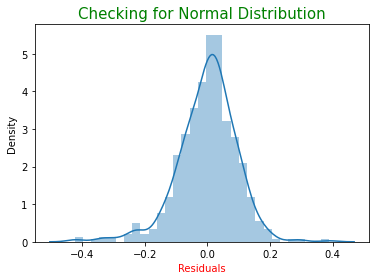

In [63]:
# plot the histogram of residuals

sns.distplot(res)
plt.title('Checking for Normal Distribution',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.xlabel('Residuals', color='r')
plt.show()

> **Insights:**
We can clearly see, that the residual terms are normally distributed

### <font color=blue> Multicollinearity

In [64]:
# check VIF values

vif = check_vif(X_train_new)
vif

,Features,VIF
2,atemp,4.37
4,season_summer,2.14
0,yr,2.06
5,season_winter,1.71
6,mnth_aug,1.69
9,weathersit_mist+cloudy,1.59
3,season_spring,1.51
7,mnth_sep,1.39
8,weathersit_lightsnow+rain,1.06
1,holiday,1.04


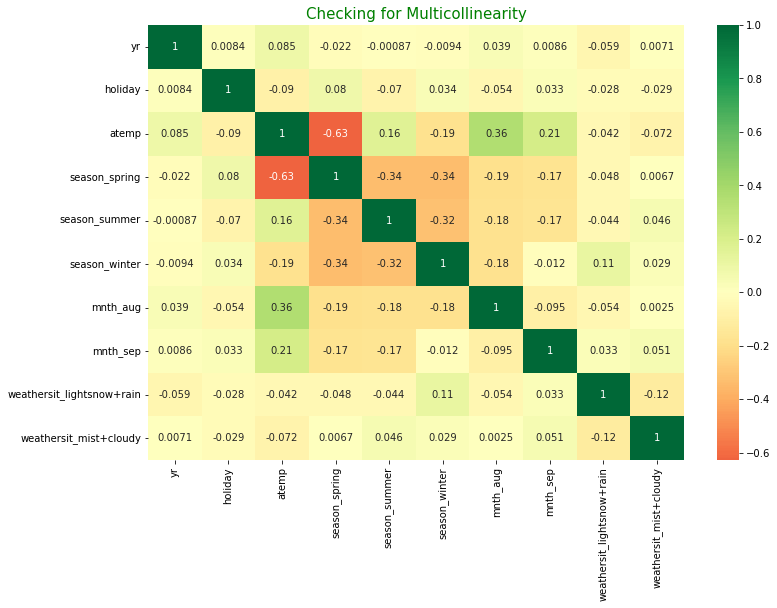

In [65]:
# correlation using heatmap

plt.figure(figsize = (12, 8))
sns.heatmap(X_train_new.corr(), annot=True, cmap='RdYlGn', center=0)
plt.title('Checking for Multicollinearity',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.show()

> **Insights:**
Looking at VIF values (less than 5) and the correlation heatmap, we can say that there is no multicollinearity

### <font color=blue> No Autocorrelation of Residuals

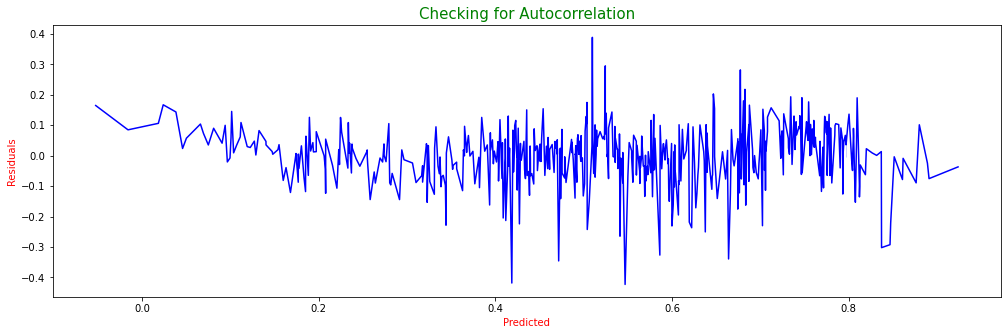

In [66]:
# plot a line graph between residuals vs y_pred

plt.figure(figsize=(17,5))
sns.lineplot(x=y_train_pred, y=res, color='b')

plt.title('Checking for Autocorrelation',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})

plt.xlabel('Predicted', color='r')
plt.ylabel('Residuals', color='r')

plt.show()

> **Insights:** There seems to be no trend for error values, so there is no autocorrelation

### <font color=blue> Homoscedasticity

Text(0, 0.5, 'Residuals')

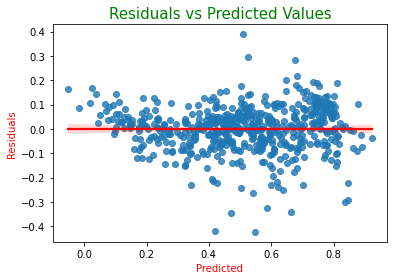

In [67]:
# plot a scatterplot between residuals vs y_pred

sns.regplot(x= y_train_pred, y=res, line_kws={'color':'red'})

plt.title('Residuals vs Predicted Values', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})               
plt.xlabel('Predicted', color='r')                       
plt.ylabel('Residuals', color='r')                       

> **Insights:** We can see almost constant variance of residuals here, so no problem of Heteroscedasticity

### <font color=blue> Linearity

In [68]:
# check all the variables
X_train_new.columns

Index(['yr', 'holiday', 'atemp', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_sep', 'weathersit_lightsnow+rain',
       'weathersit_mist+cloudy'],
      dtype='object')

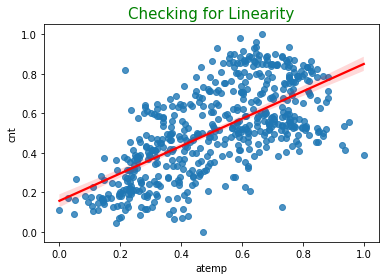

In [69]:
# plot scatterplot between cnt and atemp

sns.regplot(y=y_train, x=X_train['atemp'], line_kws={'color':'r'})
plt.title('Checking for Linearity', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.show()

> **Insights:** 
- All the variables except `atemp` are dummy variables, so no need to check for linearity for them
- `atemp` is linear with `cnt` as can be seen 

## <font color=red>Step 7 : Making Predictions

### <font color=blue> Applying scaling on test sets

In [70]:
df_test_new = df_test.copy()

In [71]:
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']  # numerical variables
df_test_new[num_vars] = scaler.transform(df_test[num_vars]) # apply transform()

### <font color=blue> Dividing test set into X and y

In [72]:
# divide into X_test and y_test

y_test = df_test_new.pop('cnt')
X_test = df_test_new

In [73]:
# adding constant to X_test
X_test_new = sm.add_constant(X_test)

In [74]:
# dropping the variables dropped in our model
X_test_new = X_test_new[X_train_lm.columns]

In [75]:
# making prediction
y_pred = lm.predict(X_test_new)

# <font color=red>Step 8 : Evaluation

### <font color=blue> Evaluation of test via comparison of y_pred and y_test

In [76]:
# import library
from sklearn.metrics import r2_score

# calculate r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

# calculate adj. r2 score
adjr2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train_new.shape[1]-1)
adjr2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_train_new.shape[1]-1)

# display the scores
print('R2 score for train data:',round(r2_train,2))
print('R2 score for test data:',round(r2_test,2))
print('')
print('Adj. R2 score for train data:',round(adjr2_train,2))
print('Adj. R2 score for test data:',round(adjr2_test,2))

R2 score for train data: 0.83
R2 score for test data: 0.79

Adj. R2 score for train data: 0.82
Adj. R2 score for test data: 0.78


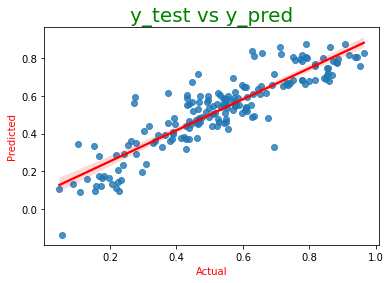

In [77]:
# Plotting y_test and y_pred to understand the spread

sns.regplot(x= y_test, y=y_pred, line_kws={'color':'r'})

plt.title('y_test vs y_pred', fontsize = 20, color='g')               
plt.xlabel('Actual', color='r')                       
plt.ylabel('Predicted', color='r')                       
plt.show()

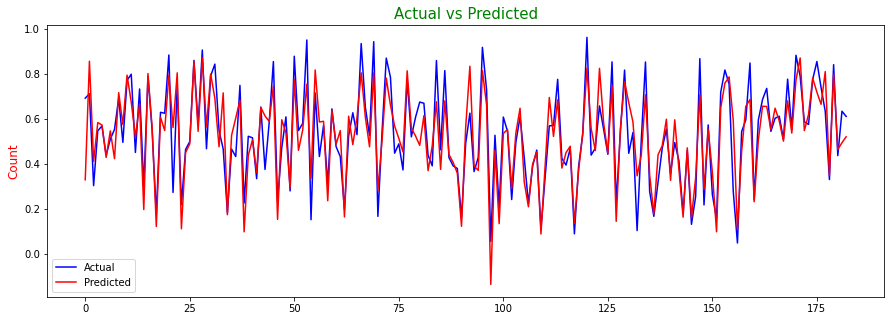

In [78]:
idx = [i for i in range(len(y_test))]
plt.figure(figsize=(15,5))
sns.lineplot(x=idx, y=y_test, color='b')
sns.lineplot(x=idx, y=y_pred, color='r')

plt.legend(['Actual','Predicted'])

plt.title('Actual vs Predicted',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.ylabel('Count', color='r', fontsize=12)

plt.show()

In [79]:
# parameters of our model
pd.DataFrame(round(lm.params,3)).rename(columns={0:'coeff'}).sort_values(by='coeff', ascending=False)

,coeff
atemp,0.504
yr,0.233
const,0.134
mnth_sep,0.108
season_winter,0.107
season_summer,0.066
mnth_aug,0.050
season_spring,-0.059
weathersit_mist+cloudy,-0.080
holiday,-0.112


We can see that best fitted line for our model is:

*cnt* = 0.134 + (0.504 x *atemp*) + (0.233 x *yr*)  + (0.108 x *mnth_sep*) + (0.107 x *season_winter*) + (0.066 x *season_summer*) + (0.050 x *mnth_aug*) - (0.059 x *season_spring*) - (0.080 x *weathersit_mist+cloudy*) - (0.112 x *holiday*) - (0.294 x *weathersit_lightsnow+rain*)

> **Insight:** 
- There isn't much difference between r2_score and adj. r2_score of test and train data
- There isn't much difference between graph of Actual and Predicted values

### <font color=blue>Evaluation of the model using Statistics

In [80]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     253.6
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          6.41e-196
Time:                        22:53:22   Log-Likelihood:                 517.77
No. Observations:                 547   AIC:                            -1014.
Df Residuals:                     536   BIC:                            -966.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1339      0.028      4.749      0.000       0.079       0.189
yr                            0.2330      0.008     28.502      0.000       0.217       0.249
holiday                      -0.1123      0.025     -4.483      0.000      -0.162      -0.063
atemp                         0.5038      0.033     15.188      0.000       0.439       0.569
season_spring                -0.0589      0.022     -2.738      0.006      -0.101      -0.017
season_summer                 0.0656      0.016      4.071      0.000       0.034       0.097
season_winter                 0.1072      0.018      6.060      0.000       0.072       0.142
mnth_aug                      0.0496      0.018      2.730      0.007       0.014       0.085
mnth_sep                      0.1076      0.017      6.154      0.000       0.073       0.142
weathersit_lightsnow+rain    -0.2937      0.025    -11.591      0.000      -0.343      -0.244
weathersit_mist+cloudy       -0.0798      0.009     -9.173      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       70.536   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.820
Skew:                          -0.648   Prob(JB):                     2.71e-41
Kurtosis:                       5.553   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Insight:** 
1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.826 and 0.822 - `82%` variance explained.
2. *F-stats and Prob(F-stats) (overall model fit)* - 253.6 and 6.41e-196(approx. 0.0) - Model fir is significant and explained `82%` variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

## <font color=red> Conclusion

Significant features in the model are
- atemp	
- yr	
- mnth_sep	
- season_winter	
- season_summer	
- mnth_aug	
- season_spring	
- weathersit_mist+cloudy	
- holiday	
- weathersit_lightsnow+rain	

## <font color=red> Interepretation of Results
- Company should focus on mostly fall and summer season, when the temperatures are relatively higher, that is when counts are higher.
- Company should focus more when weather is clear as cloudy weather or light rains or snow negatively impact the count.
- Company should focus more in the months of september and August.
- Holidays negaitvely impact the count.
- 2019 year was more beneficial compared to 2018, thus the count may increase in upcoming years.